# Exploration of data to determine a test and training set

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray.plot as xplt
import cftime

In [2]:
cp_model_rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
platecarree = ccrs.PlateCarree()

In [3]:
gcmdata = xr.open_mfdataset("../../../../data/60km/rcp85/01/pr/day/*.nc").isel(time=slice(360,720)).isel(ensemble_member=0, time=0)
gcmdata

<xarray.Dataset>
Dimensions:                       (bnds: 2, projection_x_coordinate: 17, projection_y_coordinate: 23)
Coordinates:
    ensemble_member               int32 1
    time                          object 1980-12-01 12:00:00
  * projection_y_coordinate       (projection_y_coordinate) float64 -9e+04 .....
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ...
    ensemble_member_id            |S27 dask.array<chunksize=(), meta=np.ndarray>
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(23, 17), meta=np.ndarray>
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(23, 17), meta=np.ndarray>
    month_number                  int32 dask.array<chunksize=(), meta=np.ndarray>
    year                          int32 dask.array<chunksize=(), meta=np.ndarray>
    yyyymmdd                      |S64 dask.array<chunksize=(), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr                            (projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(23, 17), meta=np.ndarray>
    transverse_mercator           int32 ...
    time_bnds                     (bnds) object dask.array<chunksize=(2,), meta=np.ndarray>
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 dask.array<chunksize=(23, 2), meta=np.ndarray>
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 dask.array<chunksize=(17, 2), meta=np.ndarray>
Attributes: (12/15)
    collection:      land-gcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2018-11-03T10:11:47
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      60km
    scenario:        rcp85
    source:          UKCP18 global realisation from a set of 15 perturbed var...
    title:           UKCP18 land projections - 60km global climate model, pre...
    version:         v20181122
    Conventions:     CF-1.5

In [4]:
linear_regridded_gcmdata = xr.open_dataset('../../../../derived_data/60km/rcp85/01/pr/day/pr_rcp85_land-gcm_uk_60km_01_day_rp_linear_regrid_19801201-19811130.nc').isel(ensemble_member=0, time=0)
linear_regridded_gcmdata

<xarray.Dataset>
Dimensions:                     (bnds: 2, grid_latitude: 606, grid_longitude: 484)
Coordinates:
    ensemble_member             int32 1
    time                        object 1980-12-01 12:00:00
  * grid_latitude               (grid_latitude) float64 -4.683 -4.647 ... 8.063
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          |S27 ...
    month_number                int32 ...
    year                        int32 ...
    yyyymmdd                    |S64 ...
Dimensions without coordinates: bnds
Data variables:
    pr                          (grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 ...
    time_bnds                   (bnds) object ...
    grid_latitude_bnds          (grid_latitude, bnds) float64 ...
    grid_longitude_bnds         (grid_longitude, bnds) float64 ...
Attributes: (12/18)
    collection:      land-gcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2018-11-03T10:11:47
    description:     Precipitation rate
    domain:          uk
    frequency:       day
    ...              ...
    resolution:      60km
    scenario:        rcp85
    source:          UKCP18 global realisation from a set of 15 perturbed var...
    title:           UKCP18 land projections - 60km global climate model, pre...
    version:         v20181122
    Conventions:     CF-1.7

In [5]:
cpmdata = xr.open_mfdataset("../../../../data/2.2km/rcp85/01/pr/day/pr_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc").isel(ensemble_member=0, time=0)
cpmdata

<xarray.Dataset>
Dimensions:                     (bnds: 2, grid_latitude: 606, grid_longitude: 484)
Coordinates:
    ensemble_member             int32 1
    time                        object 1980-12-01 12:00:00
  * grid_latitude               (grid_latitude) float64 -4.683 -4.647 ... 8.063
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          |S27 dask.array<chunksize=(), meta=np.ndarray>
    latitude                    (grid_latitude, grid_longitude) float64 dask.array<chunksize=(606, 484), meta=np.ndarray>
    longitude                   (grid_latitude, grid_longitude) float64 dask.array<chunksize=(606, 484), meta=np.ndarray>
    month_number                int32 dask.array<chunksize=(), meta=np.ndarray>
    year                        int32 dask.array<chunksize=(), meta=np.ndarray>
    yyyymmdd                    |S64 dask.array<chunksize=(), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr                          (grid_latitude, grid_longitude) float32 dask.array<chunksize=(606, 484), meta=np.ndarray>
    rotated_latitude_longitude  int32 ...
    time_bnds                   (bnds) object dask.array<chunksize=(2,), meta=np.ndarray>
    grid_latitude_bnds          (grid_latitude, bnds) float64 dask.array<chunksize=(606, 2), meta=np.ndarray>
    grid_longitude_bnds         (grid_longitude, bnds) float64 dask.array<chunksize=(484, 2), meta=np.ndarray>
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-07-30T06:13:12
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5

In [6]:
def plot_latlong_chunk(data, variable='pr'):
    plt.figure(figsize=(14,6))

    ax = plt.axes(projection=cp_model_rotated_pole)

    data[variable].plot(ax=ax, x='longitude', y='latitude', add_colorbar=False, transform=platecarree)

    ax.coastlines()
    
    plt.show()

In [7]:
def plot_rp_chunk(data, variable='pr'):
    plt.figure(figsize=(14,6))

    ax = plt.axes(projection=cp_model_rotated_pole)

    data[variable].plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=False, transform=cp_model_rotated_pole)

    ax.coastlines()
    
    plt.show()

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


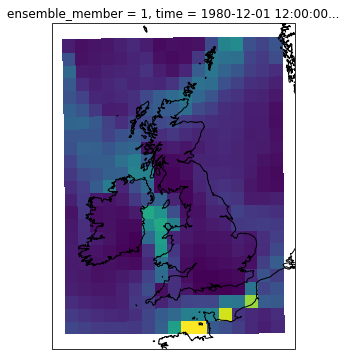

In [8]:
plot_latlong_chunk(gcmdata)

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


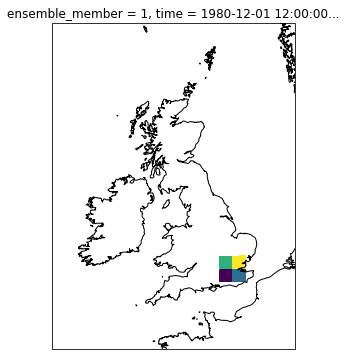

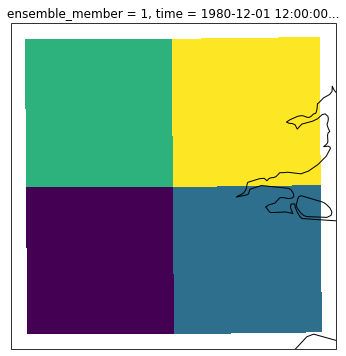

In [8]:
london_gcmdata = gcmdata.where((gcmdata.latitude < 51.5) & (gcmdata.latitude > 51), drop=True).where((gcmdata.longitude < 1.2) & (gcmdata.longitude > -1.2), drop=True)
london_gcmdata = gcmdata.sel(projection_x_coordinate=[510000, 570000], projection_y_coordinate=[150000., 210000.])
london_mask_gcmdata = gcmdata \
    .where((gcmdata.latitude >= london_gcmdata.latitude.values.min()) & (gcmdata.latitude <= london_gcmdata.latitude.values.max())) \
    .where((gcmdata.longitude >= london_gcmdata.longitude.values.min()) & (gcmdata.longitude <= london_gcmdata.longitude.values.max()))
plot_latlong_chunk(london_mask_gcmdata)
plot_latlong_chunk(london_gcmdata)

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


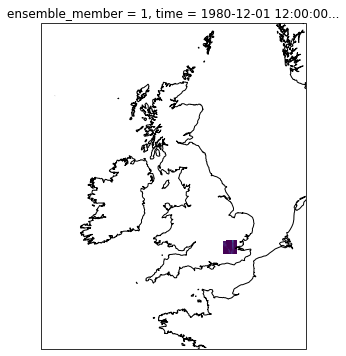

In [9]:
london_cpmdata = cpmdata \
    .where((cpmdata.longitude <= london_gcmdata.longitude.max().values) & (cpmdata.longitude >= london_gcmdata.longitude.min().values)) \
    .where((cpmdata.latitude <= london_gcmdata.latitude.max().values) & (cpmdata.latitude >= london_gcmdata.latitude.min().values))
plot_latlong_chunk(london_cpmdata)

In [11]:
np.where(cpmdata.grid_latitude.values==london_cpmdata.grid_latitude.values[14])

(array([14]),)

In [12]:
np.where(cpmdata.grid_longitude.values==london_cpmdata.grid_longitude.values[24])

(array([24]),)

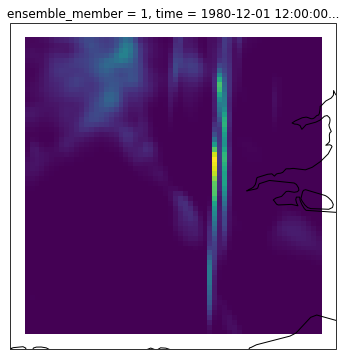

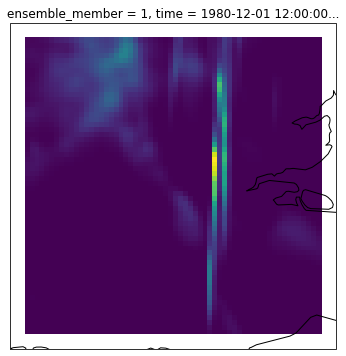

In [13]:
plot_latlong_chunk(cpmdata.isel(grid_latitude=range(139,199), grid_longitude=range(331, 391)))
plot_rp_chunk(cpmdata.isel(grid_latitude=range(139,199), grid_longitude=range(331, 391)))

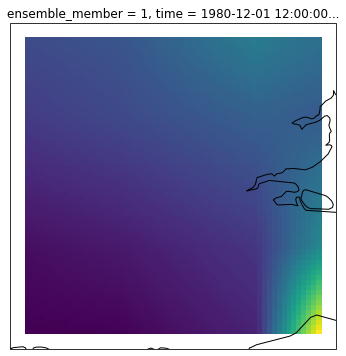

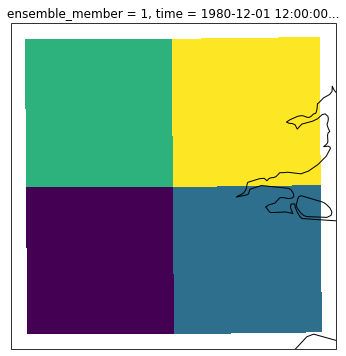

In [14]:
plot_rp_chunk(linear_regridded_gcmdata.isel(grid_latitude=range(139,199), grid_longitude=range(331, 391)))
plot_latlong_chunk(london_gcmdata)

In [15]:
linear_regridded_gcmdata

<xarray.Dataset>
Dimensions:                     (bnds: 2, grid_latitude: 606, grid_longitude: 484)
Coordinates:
    ensemble_member             int32 1
    time                        object 1980-12-01 12:00:00
  * grid_latitude               (grid_latitude) float64 -4.683 -4.647 ... 8.063
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          |S27 b'HadGEM3-GC3.05-r001i1p00000'
    month_number                int32 12
    year                        int32 1980
    yyyymmdd                    |S64 b'19801201                              ...
Dimensions without coordinates: bnds
Data variables:
    pr                          (grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (bnds) object 1980-12-01 00:00:00 1980-12-02 ...
    grid_latitude_bnds          (grid_latitude, bnds) float64 -4.701 ... 8.081
    grid_longitude_bnds         (grid_longitude, bnds) float64 353.9 ... 364.3
Attributes: (12/18)
    collection:      land-gcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2018-11-03T10:11:47
    description:     Precipitation rate
    domain:          uk
    frequency:       day
    ...              ...
    resolution:      60km
    scenario:        rcp85
    source:          UKCP18 global realisation from a set of 15 perturbed var...
    title:           UKCP18 land projections - 60km global climate model, pre...
    version:         v20181122
    Conventions:     CF-1.7

Alternatively for raw GCM can look up OSBG position of (centre of) London
And for CPM grid use cartopy to convert lat, long of (centre of) London to rotated pol

Then can use using numpy.where to determine the index of that point in the proj_x, proj_y, grid_lat, grid_long arrays and from there get a box around it.

In [10]:
subsel_cpm = xr.open_mfdataset("../../../../derived_data/2.2km-london/rcp85/01/pr/day/*.nc")
subsel_regrid_pr = xr.open_mfdataset("../../../../derived_data/60km-2.2km-regrid-lin-london/rcp85/01/pr/day/*.nc")
subsel_regrid_psl = xr.open_mfdataset("../../../../derived_data/60km-2.2km-regrid-lin-london/rcp85/01/psl/day/*.nc")

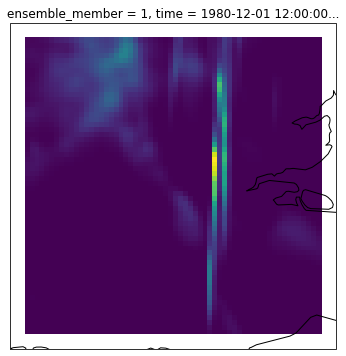

<xarray.Dataset>
Dimensions:                     (bnds: 2, ensemble_member: 1, grid_latitude: 60, grid_longitude: 60, time: 21600)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1980-12-01 12:00:00 ... 2080-11...
  * grid_latitude               (grid_latitude) float64 -1.58 -1.56 ... -0.3999
  * grid_longitude              (grid_longitude) float64 360.9 360.9 ... 362.1
    ensemble_member_id          (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    latitude                    (grid_latitude, grid_longitude) float64 dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude                   (grid_latitude, grid_longitude) float64 dask.array<chunksize=(60, 60), meta=np.ndarray>
    month_number                (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    year                        (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    yyyymmdd                    (time) |S64 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr                          (ensemble_member, time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(1, 360, 60, 60), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float64 dask.array<chunksize=(360, 60, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float64 dask.array<chunksize=(360, 60, 2), meta=np.ndarray>
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-07-30T06:13:12
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5

In [11]:
plot_rp_chunk(subsel_cpm.isel(ensemble_member=0, time=0))

subsel_cpm

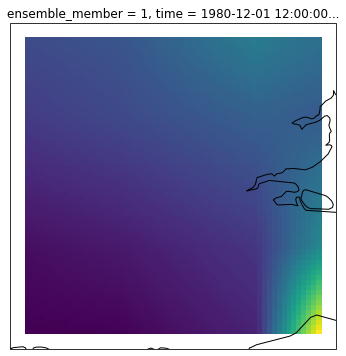

<xarray.Dataset>
Dimensions:                     (bnds: 2, ensemble_member: 1, grid_latitude: 60, grid_longitude: 60, time: 21600)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1980-12-01 12:00:00 ... 2080-11...
  * grid_latitude               (grid_latitude) float64 -1.58 -1.56 ... -0.3999
  * grid_longitude              (grid_longitude) float64 360.9 360.9 ... 362.1
    ensemble_member_id          (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    month_number                (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    year                        (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    yyyymmdd                    (time) |S64 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr                          (ensemble_member, time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(1, 360, 60, 60), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float64 dask.array<chunksize=(360, 60, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float64 dask.array<chunksize=(360, 60, 2), meta=np.ndarray>
Attributes: (12/18)
    collection:      land-gcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2018-11-03T10:11:47
    description:     Precipitation rate
    domain:          uk
    frequency:       day
    ...              ...
    resolution:      60km
    scenario:        rcp85
    source:          UKCP18 global realisation from a set of 15 perturbed var...
    title:           UKCP18 land projections - 60km global climate model, pre...
    version:         v20181122
    Conventions:     CF-1.7

In [12]:
plot_rp_chunk(subsel_regrid_pr.isel(ensemble_member=0, time=0), variable='pr')

subsel_regrid_pr

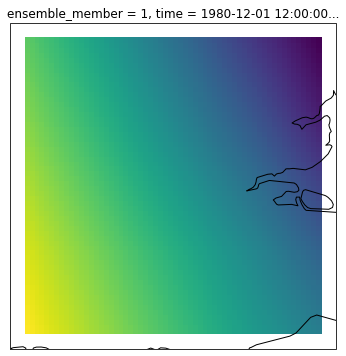

<xarray.Dataset>
Dimensions:                     (bnds: 2, ensemble_member: 1, grid_latitude: 60, grid_longitude: 60, time: 21600)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1980-12-01 12:00:00 ... 2080-11...
  * grid_latitude               (grid_latitude) float64 -1.58 -1.56 ... -0.3999
  * grid_longitude              (grid_longitude) float64 360.9 360.9 ... 362.1
    ensemble_member_id          (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    month_number                (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    year                        (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    yyyymmdd                    (time) |S64 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    psl                         (ensemble_member, time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(1, 360, 60, 60), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float64 dask.array<chunksize=(360, 60, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float64 dask.array<chunksize=(360, 60, 2), meta=np.ndarray>
Attributes: (12/18)
    collection:      land-gcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2018-11-03T19:32:06
    description:     Sea level pressure
    domain:          uk
    frequency:       day
    ...              ...
    resolution:      60km
    scenario:        rcp85
    source:          UKCP18 global realisation from a set of 15 perturbed var...
    title:           UKCP18 land projections - 60km global climate model, sea...
    version:         v20181122
    Conventions:     CF-1.7

In [13]:
plot_rp_chunk(subsel_regrid_psl.isel(ensemble_member=0, time=0), variable='psl')

subsel_regrid_psl

# Extract wettest 10% of days

In [52]:
# Find the timestamps of the wettest 100 days (for a single ensemble member), where wetness of a day is defined simply as the summation of pr of all the grid squares for that day
wettest_100_days = subsel_regrid_pr.isel(ensemble_member=0).sum(dim=['grid_latitude', 'grid_longitude']).sortby('pr').isel(time=slice(-101, -1)).time.values

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 354 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 354 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 354 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 354 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order in

In [53]:
wettest_100_subsel_regrid_pr = subsel_regrid_pr.where(subsel_regrid_pr.time.isin(wettest_100_days), drop=True)
wettest_100_subsel_regrid_pr

<xarray.Dataset>
Dimensions:                     (bnds: 2, ensemble_member: 1, grid_latitude: 60, grid_longitude: 60, time: 100)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1981-11-03 12:00:00 ... 2080-02...
  * grid_latitude               (grid_latitude) float64 -1.58 -1.56 ... -0.3999
  * grid_longitude              (grid_longitude) float64 360.9 360.9 ... 362.1
    ensemble_member_id          (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    month_number                (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    year                        (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    yyyymmdd                    (time) |S64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr                          (ensemble_member, time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(1, 1, 60, 60), meta=np.ndarray>
    rotated_latitude_longitude  (time) float64 -2.147e+09 ... -2.147e+09
    time_bnds                   (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float64 dask.array<chunksize=(1, 60, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float64 dask.array<chunksize=(1, 60, 2), meta=np.ndarray>
Attributes: (12/18)
    collection:      land-gcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2018-11-03T10:11:47
    description:     Precipitation rate
    domain:          uk
    frequency:       day
    ...              ...
    resolution:      60km
    scenario:        rcp85
    source:          UKCP18 global realisation from a set of 15 perturbed var...
    title:           UKCP18 land projections - 60km global climate model, pre...
    version:         v20181122
    Conventions:     CF-1.7

## Turn numpy variable files into Dataloader

In [21]:
import torch

In [22]:
from torch.utils.data import random_split, DataLoader, TensorDataset

In [37]:
variables = ['pr', 'psl']
lo_res_files = [ f'../../../../derived_data/60km-2.2km-regrid-lin-london/numpy/rcp85/01/{var}/day/{var}.npy' for var in variables ]

unstacked_X = map(torch.tensor, map(np.load, lo_res_files))
X = torch.stack(list(unstacked_X), dim=1)

hi_res_file = '../../../../derived_data/2.2km-london/numpy/rcp85/01/pr/day/pr.npy'

y = torch.tensor(np.load(hi_res_file)).unsqueeze(dim=1)

all_data = TensorDataset(X, y)

train_size = int(0.7 * len(all_data))
val_size = len(all_data) - train_size
train_set, val_set = random_split(all_data, [train_size, val_size])

train_dl = DataLoader(train_set, batch_size=64)
val_dl = DataLoader(val_set, batch_size=64)